<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/Animals_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

In [2]:
!git clone https://github.com/mohanrajmit/Image-Read.git

Cloning into 'Image-Read'...
remote: Enumerating objects: 3113, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 3113 (delta 38), reused 26 (delta 23), pack-reused 3061
Receiving objects: 100% (3113/3113), 191.76 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [3]:
from imutils import paths
import cv2

In [4]:
def load(imagePaths):
  # initialize the list of features and labels
  data = []
  labels = []

  # loop over the input images
  for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label assuming
    # that our path has the following format:
    # /path/to/dataset/{class}/{image}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split("/")[-2]
    if label == "cats":
      labels.append(0)
    elif label =="dogs":
      labels.append(1)
    else:
      labels.append(2)
    #label = imagePath.split(os.path.sep)[-2]
    image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)

    # treat our processed image as a "feature vector"
    # by updating the data list followed by the labels
    data.append(image)
    #labels.append(label)

    # show an update every `verbose` images
    #if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
    #print("[INFO] processed {}/{}".format(i + 1,
    #len(imagePaths)))

    # return a tuple of the data and labels
  return (np.array(data), np.array(labels))

In [5]:
imagePaths = list(paths.list_images("/content/Image-Read/animals"))
print(imagePaths)


['/content/Image-Read/animals/cats/cats_00857.jpg', '/content/Image-Read/animals/cats/cats_00359.jpg', '/content/Image-Read/animals/cats/cats_00005.jpg', '/content/Image-Read/animals/cats/cats_00137.jpg', '/content/Image-Read/animals/cats/cats_00595.jpg', '/content/Image-Read/animals/cats/cats_00143.jpg', '/content/Image-Read/animals/cats/cats_00505.jpg', '/content/Image-Read/animals/cats/cats_00413.jpg', '/content/Image-Read/animals/cats/cats_00153.jpg', '/content/Image-Read/animals/cats/cats_00461.jpg', '/content/Image-Read/animals/cats/cats_00797.jpg', '/content/Image-Read/animals/cats/cats_00899.jpg', '/content/Image-Read/animals/cats/cats_00075.jpg', '/content/Image-Read/animals/cats/cats_00888.jpg', '/content/Image-Read/animals/cats/cats_00573.jpg', '/content/Image-Read/animals/cats/cats_00178.jpg', '/content/Image-Read/animals/cats/cats_00506.jpg', '/content/Image-Read/animals/cats/cats_00113.jpg', '/content/Image-Read/animals/cats/cats_00556.jpg', '/content/Image-Read/animals/c

In [6]:
(data, labels) = load(imagePaths)

data = data.reshape((3000, 3072))

In [7]:
print(data.shape)

(3000, 3072)


In [8]:
print(labels.shape)

(3000,)


In [9]:
#X_train = X_train.reshape(60000,784)
#X_test = X_test.reshape(10000,784)

data = data.astype('float32')
#X_test = X_test.astype('float32')

data/=255
#X_test/=255

In [10]:
number_of_classes = 3

Y_train = np_utils.to_categorical(labels, number_of_classes)
#Y_test = np_utils.to_categorical(y_test, number_of_classes)

#y_train[100], Y_train[100]
Y_train[10]

array([1., 0., 0.], dtype=float32)

In [11]:
model = Sequential()

model.add(Dense(2000, input_dim=3072,activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
#model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(1000,activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
#model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 8,247,403
Trainable params: 8,247,403
Non-

In [14]:
hist = model.fit(data, Y_train, batch_size=128, epochs=100)

Epoch 1/100
24/24 [==============================] - 6s 7ms/step - loss: 1.6032 - accuracy: 0.3727
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.9666 - accuracy: 0.4850
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.9251 - accuracy: 0.5017
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8786 - accuracy: 0.5263
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8566 - accuracy: 0.5640
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8408 - accuracy: 0.5680
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8445 - accuracy: 0.5747
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8258 - accuracy: 0.5800
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8452 - accuracy: 0.5633
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8002 - accuracy: 0.5863
Epoch 11/

In [15]:
label_name=["cats","dogs","panda"]

1/1 [==============================] - 0s 130ms/step
[[1.0000000e+00 1.3923025e-16 0.0000000e+00]]


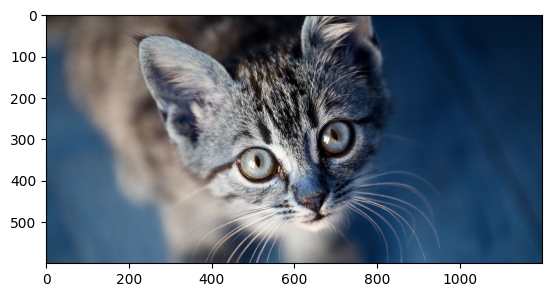

In [17]:
img=cv2.imread("/content/1.png")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
b = np.expand_dims(img1, axis=0)
res=model.predict(b)
print(res)
#print(label_name[int(res)])

plt.imshow(img)